<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classeS. We will use CNN for classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

C:\Users\Reshma\anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 50s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

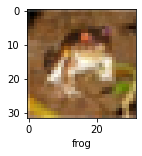

In [10]:
plot_sample(X_train, y_train, 0)

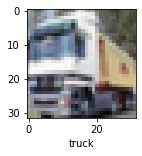

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 133s 83ms/step - loss: 1.8112 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 128s 82ms/step - loss: 1.6217 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 128s 82ms/step - loss: 1.5413 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 128s 82ms/step - loss: 1.4817 - accuracy: 0.4787
Epoch 5/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4297 - accuracy: 0.4962


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.31      0.43      1000
           1       0.65      0.53      0.58      1000
           2       0.32      0.49      0.39      1000
           3       0.41      0.23      0.29      1000
           4       0.53      0.24      0.33      1000
           5       0.42      0.33      0.37      1000
           6       0.51      0.55      0.53      1000
           7       0.40      0.73      0.52      1000
           8       0.52      0.73      0.61      1000
           9       0.52      0.59      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 54s 33ms/step - loss: 1.4772 - accuracy: 0.4699
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1215 - accuracy: 0.6052
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9938 - accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9126 - accuracy: 0.6852
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8542 - accuracy: 0.7044
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8041 - accuracy: 0.7231
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7575 - accuracy: 0.7383
Epoch 8/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7214 - accuracy: 0.7499
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6839 - accuracy: 0.7626
Epoch 10/10
1563/1563 [==============================] - 42s 27m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9453 - accuracy: 0.6921


[0.9453132748603821, 0.6920999884605408]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[3.61946668e-03, 8.19819907e-05, 6.69903867e-03, 6.59564853e-01,
        1.16857258e-03, 1.36342451e-01, 8.77758209e-03, 1.94361855e-04,
        1.83542535e-01, 9.09623577e-06],
       [3.32898833e-03, 2.16934807e-03, 9.41986571e-07, 6.87420197e-07,
        1.76732428e-07, 6.78249137e-08, 4.56204447e-07, 4.26481790e-07,
        9.88213778e-01, 6.28509372e-03],
       [3.02923396e-02, 7.35535622e-02, 2.66297022e-04, 9.05063585e-04,
        2.02075797e-04, 9.10878152e-05, 1.02857023e-03, 3.37441947e-04,
        7.79825389e-01, 1.13498166e-01],
       [2.04069242e-01, 5.24814823e-04, 7.05234634e-05, 3.21746302e-05,
        9.03213077e-05, 3.40880092e-06, 3.18020284e-05, 6.44390748e-05,
        7.94932187e-01, 1.80987059e-04],
       [4.30985756e-06, 6.60057820e-04, 2.65935790e-02, 5.06868847e-02,
        5.62377691e-01, 8.69470183e-03, 3.50681156e-01, 7.87716417e-05,
        1.36973453e-04, 8.58663407e-05]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

'ship'

In [25]:
classes[y_classes[3]]

'ship'

# Convolutional Neural Network (CNN) using MNIST dataset

In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [27]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [28]:
len(X_train)

60000

In [29]:
len(X_test)

10000

In [30]:
X_train[0].shape

(28, 28)

In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

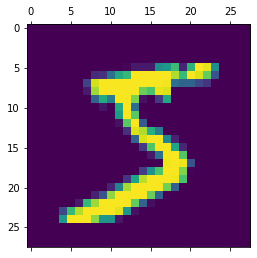

In [32]:
plt.matshow(X_train[0])

In [33]:
y_train[0]

5

In [34]:
X_train = X_train / 255
X_test = X_test / 255

In [35]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [36]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [37]:
X_train_flattened.shape

(60000, 784)

In [38]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [39]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4713 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3041 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2840 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2730 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2670 - accuracy: 0.9258


In [40]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2660 - accuracy: 0.9261


[0.2660302221775055, 0.9261000156402588]

In [41]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([2.2786347e-02, 4.3819341e-07, 5.2119732e-02, 9.6314341e-01,
       2.3264829e-03, 9.5765658e-02, 1.1389214e-06, 9.9982280e-01,
       8.8882133e-02, 5.7843697e-01], dtype=float32)

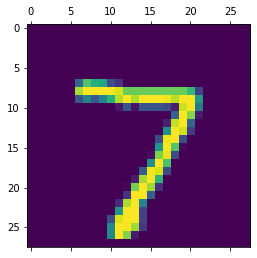

In [42]:
plt.matshow(X_test[0])

np.argmax finds a maximum element from an array and returns the index of it

In [43]:
np.argmax(y_predicted[0])

7

In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [45]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [46]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    5,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,   10,  927,   17,   10,    4,   11,   10,   37,    3],
       [   2,    0,   16,  933,    0,   19,    2,   11,   19,    8],
       [   1,    1,    5,    1,  928,    0,    7,    3,    9,   27],
       [   7,    3,    4,   38,   11,  772,   14,    7,   30,    6],
       [  10,    3,    8,    1,    8,   14,  909,    2,    3,    0],
       [   1,    7,   20,    8,    8,    0,    0,  952,    2,   30],
       [   8,   12,    7,   29,    9,   28,    8,   12,  856,    5],
       [  10,    7,    2,   15,   36,    5,    0,   26,    4,  904]])>

Text(69.0, 0.5, 'Truth')

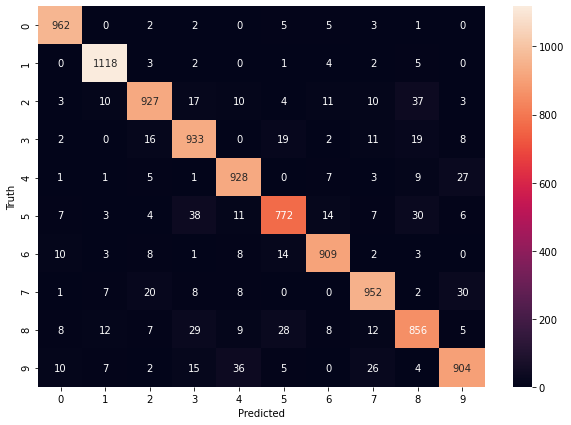

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [48]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2782 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1260 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0882 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0663 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0522 - accuracy: 0.9842


In [49]:

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0772 - accuracy: 0.9749


[0.07717820256948471, 0.9749000072479248]

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Truth')

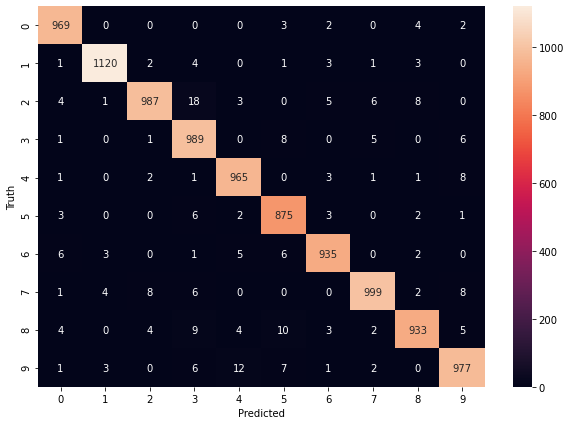

In [50]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2698 - accuracy: 0.9235
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1222 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0855 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0653 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0516 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0413 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0337 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0268 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.019

In [52]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.9757


[0.08944804966449738, 0.9757000207901001]

# Convolutional Neural Network (CNN) using FMNIST dataset

In [57]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [56]:
from keras.datasets import fashion_mnist

# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [63]:
len(x_train)


60000

In [64]:
len(x_test)

10000

In [72]:
x_train[0].shape

(28, 28)

In [66]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

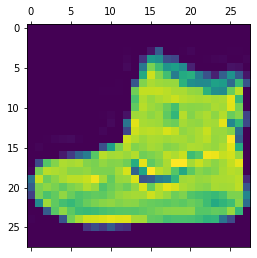

In [67]:
plt.matshow(x_train[0])

In [68]:
y_train[0]

9

In [69]:
x_train = x_train / 255
x_test = x_test / 255

In [71]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [73]:
X_train_flattened = x_train.reshape(len(x_train), 28*28)
X_test_flattened = x_test.reshape(len(x_test), 28*28)

In [74]:
X_train_flattened.shape

(60000, 784)

In [75]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [76]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6002 - accuracy: 0.7970
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4609 - accuracy: 0.8427
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4356 - accuracy: 0.8502
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4213 - accuracy: 0.8557
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4137 - accuracy: 0.8563


In [77]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4495 - accuracy: 0.8428


[0.44952720403671265, 0.8428000211715698]

In [78]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([4.0915949e-04, 1.5100666e-04, 1.3054519e-02, 4.1024392e-03,
       1.1671956e-02, 9.8974955e-01, 3.2044124e-02, 9.7696841e-01,
       8.7595999e-01, 9.9783510e-01], dtype=float32)

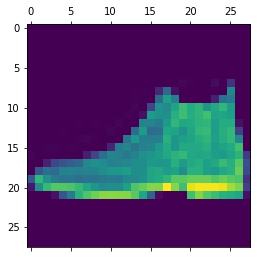

In [80]:
plt.matshow(x_test[0])

In [81]:
np.argmax(y_predicted[0])

9

In [82]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [83]:
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

In [84]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[803,   4,  12,  58,   9,   0,  97,   0,  17,   0],
       [  3, 959,   2,  28,   4,   0,   2,   0,   2,   0],
       [ 16,   5, 709,  12, 166,   1,  77,   0,  14,   0],
       [ 20,  16,  10, 877,  34,   0,  39,   0,   4,   0],
       [  0,   1,  90,  35, 799,   0,  66,   0,   9,   0],
       [  0,   0,   0,   1,   0, 919,   0,  48,   3,  29],
       [137,   3, 110,  50, 146,   0, 522,   0,  32,   0],
       [  0,   0,   0,   0,   0,  32,   0, 935,   0,  33],
       [  3,   1,   5,  10,   3,   5,  14,   4, 955,   0],
       [  0,   0,   0,   0,   0,  11,   0,  38,   1, 950]])>

Text(69.0, 0.5, 'Truth')

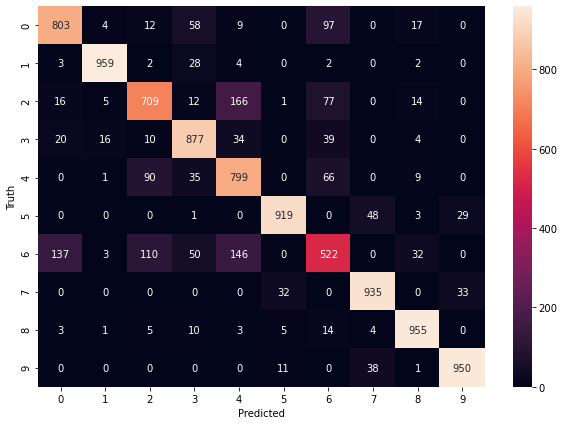

In [85]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Hidden Layer

In [86]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5016 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3801 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3416 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3173 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3010 - accuracy: 0.8886


In [87]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8764


[0.3413322865962982, 0.8763999938964844]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

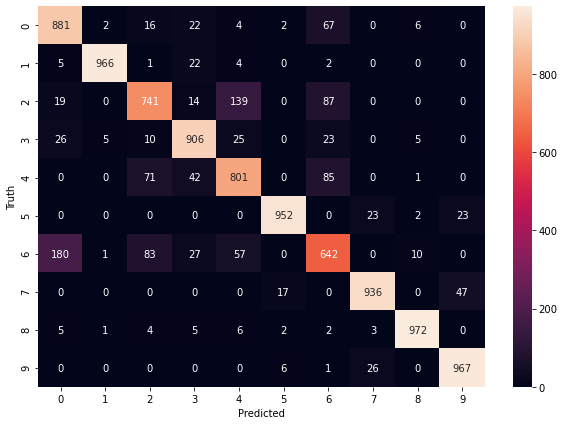

In [88]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')